In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("zomato.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [5]:
df.columns.value_counts().sum()

17

In [6]:
df.duplicated().sum()

0

In [7]:
df=df.drop(['url','dish_liked','phone','menu_item','address', 'reviews_list','reviews_list'],axis=1)

In [8]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


### reshaping the Daataset and treating null values 

In [9]:
df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [11]:

df.online_order.replace(('Yes','No'),(1, 0),inplace=True)
df.book_table.replace(('Yes','No'),(1, 0),inplace=True)

In [12]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [13]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
def changes_in_Rats(x):
    if x=='NEW' or x=='-':
        return np.nan
    else:
        x=str(x).split('/')
        x=x[0]
        return float(x)
    

In [15]:
df['rate']=df['rate'].apply(changes_in_Rats)
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [16]:
df['rate'].mean()

3.700448817952717

In [17]:
a=df['rate'].mean()
a=round(a,2)
df.rate.fillna(a,inplace=True)
df.rate.unique()


array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [18]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [19]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [20]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})

In [21]:
df.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [22]:
df['cost'].replace(',',"",regex=True,inplace=True)
df['cost']=df['cost'].astype(dtype='float64')

In [23]:
df.cost.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [24]:
df.dropna(axis=0,inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51148 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51148 non-null  object 
 1   online_order  51148 non-null  int64  
 2   book_table    51148 non-null  int64  
 3   rate          51148 non-null  float64
 4   votes         51148 non-null  int64  
 5   location      51148 non-null  object 
 6   rest_type     51148 non-null  object 
 7   cuisines      51148 non-null  object 
 8   cost          51148 non-null  float64
 9   type          51148 non-null  object 
 10  city          51148 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 4.7+ MB


In [26]:
df.select_dtypes("object")

,name,location,rest_type,cuisines,type,city
0,Jalsa,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Buffet,Banashankari
1,Spice Elephant,Banashankari,Casual Dining,"Chinese, North Indian, Thai",Buffet,Banashankari
2,San Churro Cafe,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",Buffet,Banashankari
3,Addhuri Udupi Bhojana,Banashankari,Quick Bites,"South Indian, North Indian",Buffet,Banashankari
4,Grand Village,Basavanagudi,Casual Dining,"North Indian, Rajasthani",Buffet,Banashankari
...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,Whitefield,Bar,Continental,Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,Whitefield,Bar,Finger Food,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,Whitefield,Bar,Finger Food,Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,"ITPL Main Road, Whitefield",Bar,Finger Food,Pubs and bars,Whitefield


In [27]:
df.city.value_counts()

BTM                      3252
Koramangala 7th Block    2904
Koramangala 5th Block    2803
Koramangala 4th Block    2744
Koramangala 6th Block    2589
Jayanagar                2357
JP Nagar                 2073
Indiranagar              1838
Church Street            1818
MG Road                  1785
Brigade Road             1765
Lavelle Road             1729
HSR                      1728
Marathahalli             1631
Bannerghatta Road        1601
Residency Road           1601
Whitefield               1592
Brookefield              1496
Old Airport Road         1382
Kammanahalli             1308
Kalyan Nagar             1289
Basavanagudi             1264
Sarjapur Road            1237
Electronic City          1216
Bellandur                1210
Frazer Town              1179
Malleshwaram             1093
Rajajinagar              1069
Banashankari              860
New BEL Road              735
Name: city, dtype: int64

In [28]:
df.city[df.city=='Koramangala 4th Block']='Koramangala' 
df.city[df.city=='Koramangala 5th Block']='Koramangala' 
df.city[df.city=='Koramangala 6th Block']='Koramangala' 
# df[df.city=='Koramangala 6th Block']=df[df.city=='Koramangala 7th Block'] 
# features[(features.make=='plymouth')&(Target>10000)]

In [29]:
top_15_citys=df.city.value_counts()[:20].index
# top_15_citys=np.array(top_15_citys)
top_15_citys

Index(['Koramangala', 'BTM', 'Koramangala 7th Block', 'Jayanagar', 'JP Nagar',
       'Indiranagar', 'Church Street', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'HSR', 'Marathahalli', 'Bannerghatta Road',
       'Residency Road', 'Whitefield', 'Brookefield', 'Old Airport Road',
       'Kammanahalli', 'Kalyan Nagar', 'Basavanagudi'],
      dtype='object')

In [30]:
df.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [31]:
a=df.location[df.location=='Koramangala 1st Block'].value_counts()
b=df.location[df.location=='Koramangala 3rd Block'].value_counts()
c=df.location[df.location=='Koramangala 2nd Block'].value_counts()
print(f"{a},{b},{c}")

Koramangala 1st Block    1237
Name: location, dtype: int64,Koramangala 3rd Block    216
Name: location, dtype: int64,Koramangala 2nd Block    102
Name: location, dtype: int64


In [32]:
a=df.location[df.location=='Koramangala 1st Block']='Koramangala'
b=df.location[df.location=='Koramangala 3rd Block']='Koramangala'
c=df.location[df.location=='Koramangala 2nd Block']='Koramangala'

In [33]:
df.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala', 'Frazer Town',
       'RT Nagar', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar',
       'HBR Layout', 'Domlur', 'Ejipura', 'Jeevan Bhima Nagar',
 

In [34]:
df= df[df['city'].isin(top_15_citys)]
df.city.value_counts()

Koramangala              8136
BTM                      3252
Koramangala 7th Block    2904
Jayanagar                2357
JP Nagar                 2073
Indiranagar              1838
Church Street            1818
MG Road                  1785
Brigade Road             1765
Lavelle Road             1729
HSR                      1728
Marathahalli             1631
Bannerghatta Road        1601
Residency Road           1601
Whitefield               1592
Brookefield              1496
Old Airport Road         1382
Kammanahalli             1308
Kalyan Nagar             1289
Basavanagudi             1264
Name: city, dtype: int64

In [35]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city
863,Deja Vu Resto Bar,1,1,4.4,2487,Bannerghatta Road,Pub,"North Indian, Italian",900.0,Buffet,Bannerghatta Road
864,Fattoush,1,1,4.2,1964,Bannerghatta Road,Casual Dining,"Arabian, Biryani, Chinese, Middle Eastern, Fas...",1000.0,Buffet,Bannerghatta Road
865,Empire Restaurant,1,0,4.3,3178,Bannerghatta Road,Casual Dining,"North Indian, Mughlai, South Indian, Chinese",750.0,Buffet,Bannerghatta Road
866,Abhiruchi Hotel,1,0,3.3,455,Bannerghatta Road,Casual Dining,"Andhra, Biryani, North Indian, Chinese",550.0,Buffet,Bannerghatta Road
867,Tulips,0,0,3.1,19,Bannerghatta Road,Casual Dining,"North Indian, South Indian, Chinese, Continental",800.0,Buffet,Bannerghatta Road
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.6,27,Whitefield,Bar,Continental,1500.0,Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,0,0,3.7,0,Whitefield,Bar,Finger Food,600.0,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,3.7,0,Whitefield,Bar,Finger Food,2000.0,Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,Pubs and bars,Whitefield


## Graphical analysis Dataset

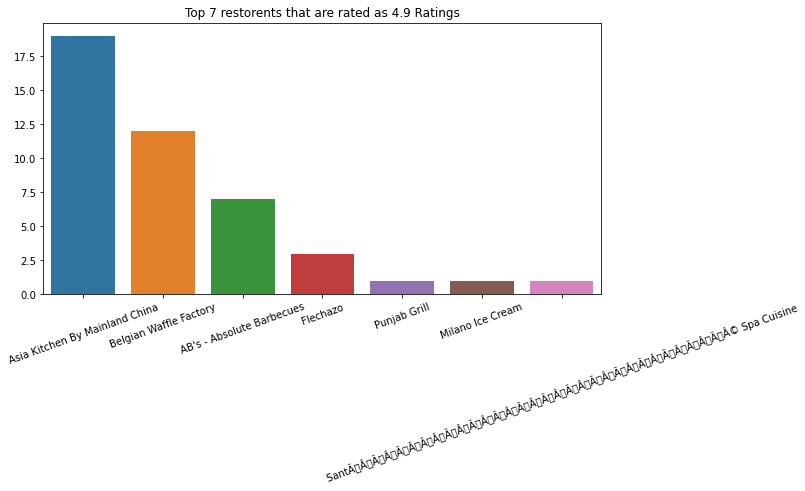

In [36]:
b=df.name.loc[df.rate==4.9].value_counts().values
a=df.name.loc[df.rate==4.9].value_counts().index

plt.figure(figsize=(10,5))
sns.barplot(x=a[:7],y=b[:7])
plt.xticks(rotation=20)
plt.title('Top 7 restorents that are rated as 4.9 Ratings')
plt.show()


### The above bar graph shows the top 7 restorents that are gettig 4.9 getting Rings

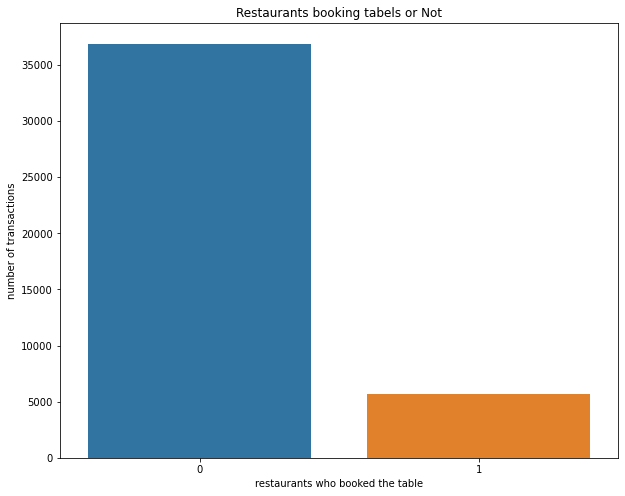

In [37]:
x=df.book_table.value_counts()
y=df.book_table.value_counts().index
plt.figure(figsize=(10,8))
sns.barplot(x=y,y=x)
plt.title("Restaurants booking tabels or Not")
plt.xlabel('restaurants who booked the table')
plt.ylabel('number of transactions')
plt.show()

## the followinotg Data shows that the most of the Restaurants do not have booked facility only 6000 0ut of 23000 costumers had booked a table before they reached the restroents

<function matplotlib.pyplot.show(close=None, block=None)>

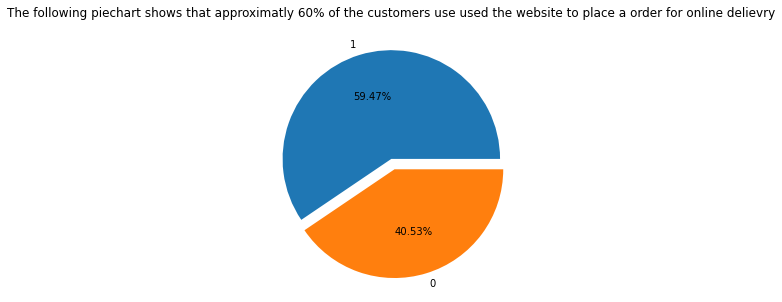

In [38]:
x=df.online_order.value_counts().values
y=df.online_order.value_counts().index
plt.figure(figsize=(5,5))
plt.pie(x,labels=y,autopct='%0.2f%%',explode=(0.0,0.1))
plt.title('The following piechart shows that approximatly 60% of the customers use used the website to place a order for online delievry')
plt.show


In [39]:
plt.rcParams['figure.figsize']=[150,75]

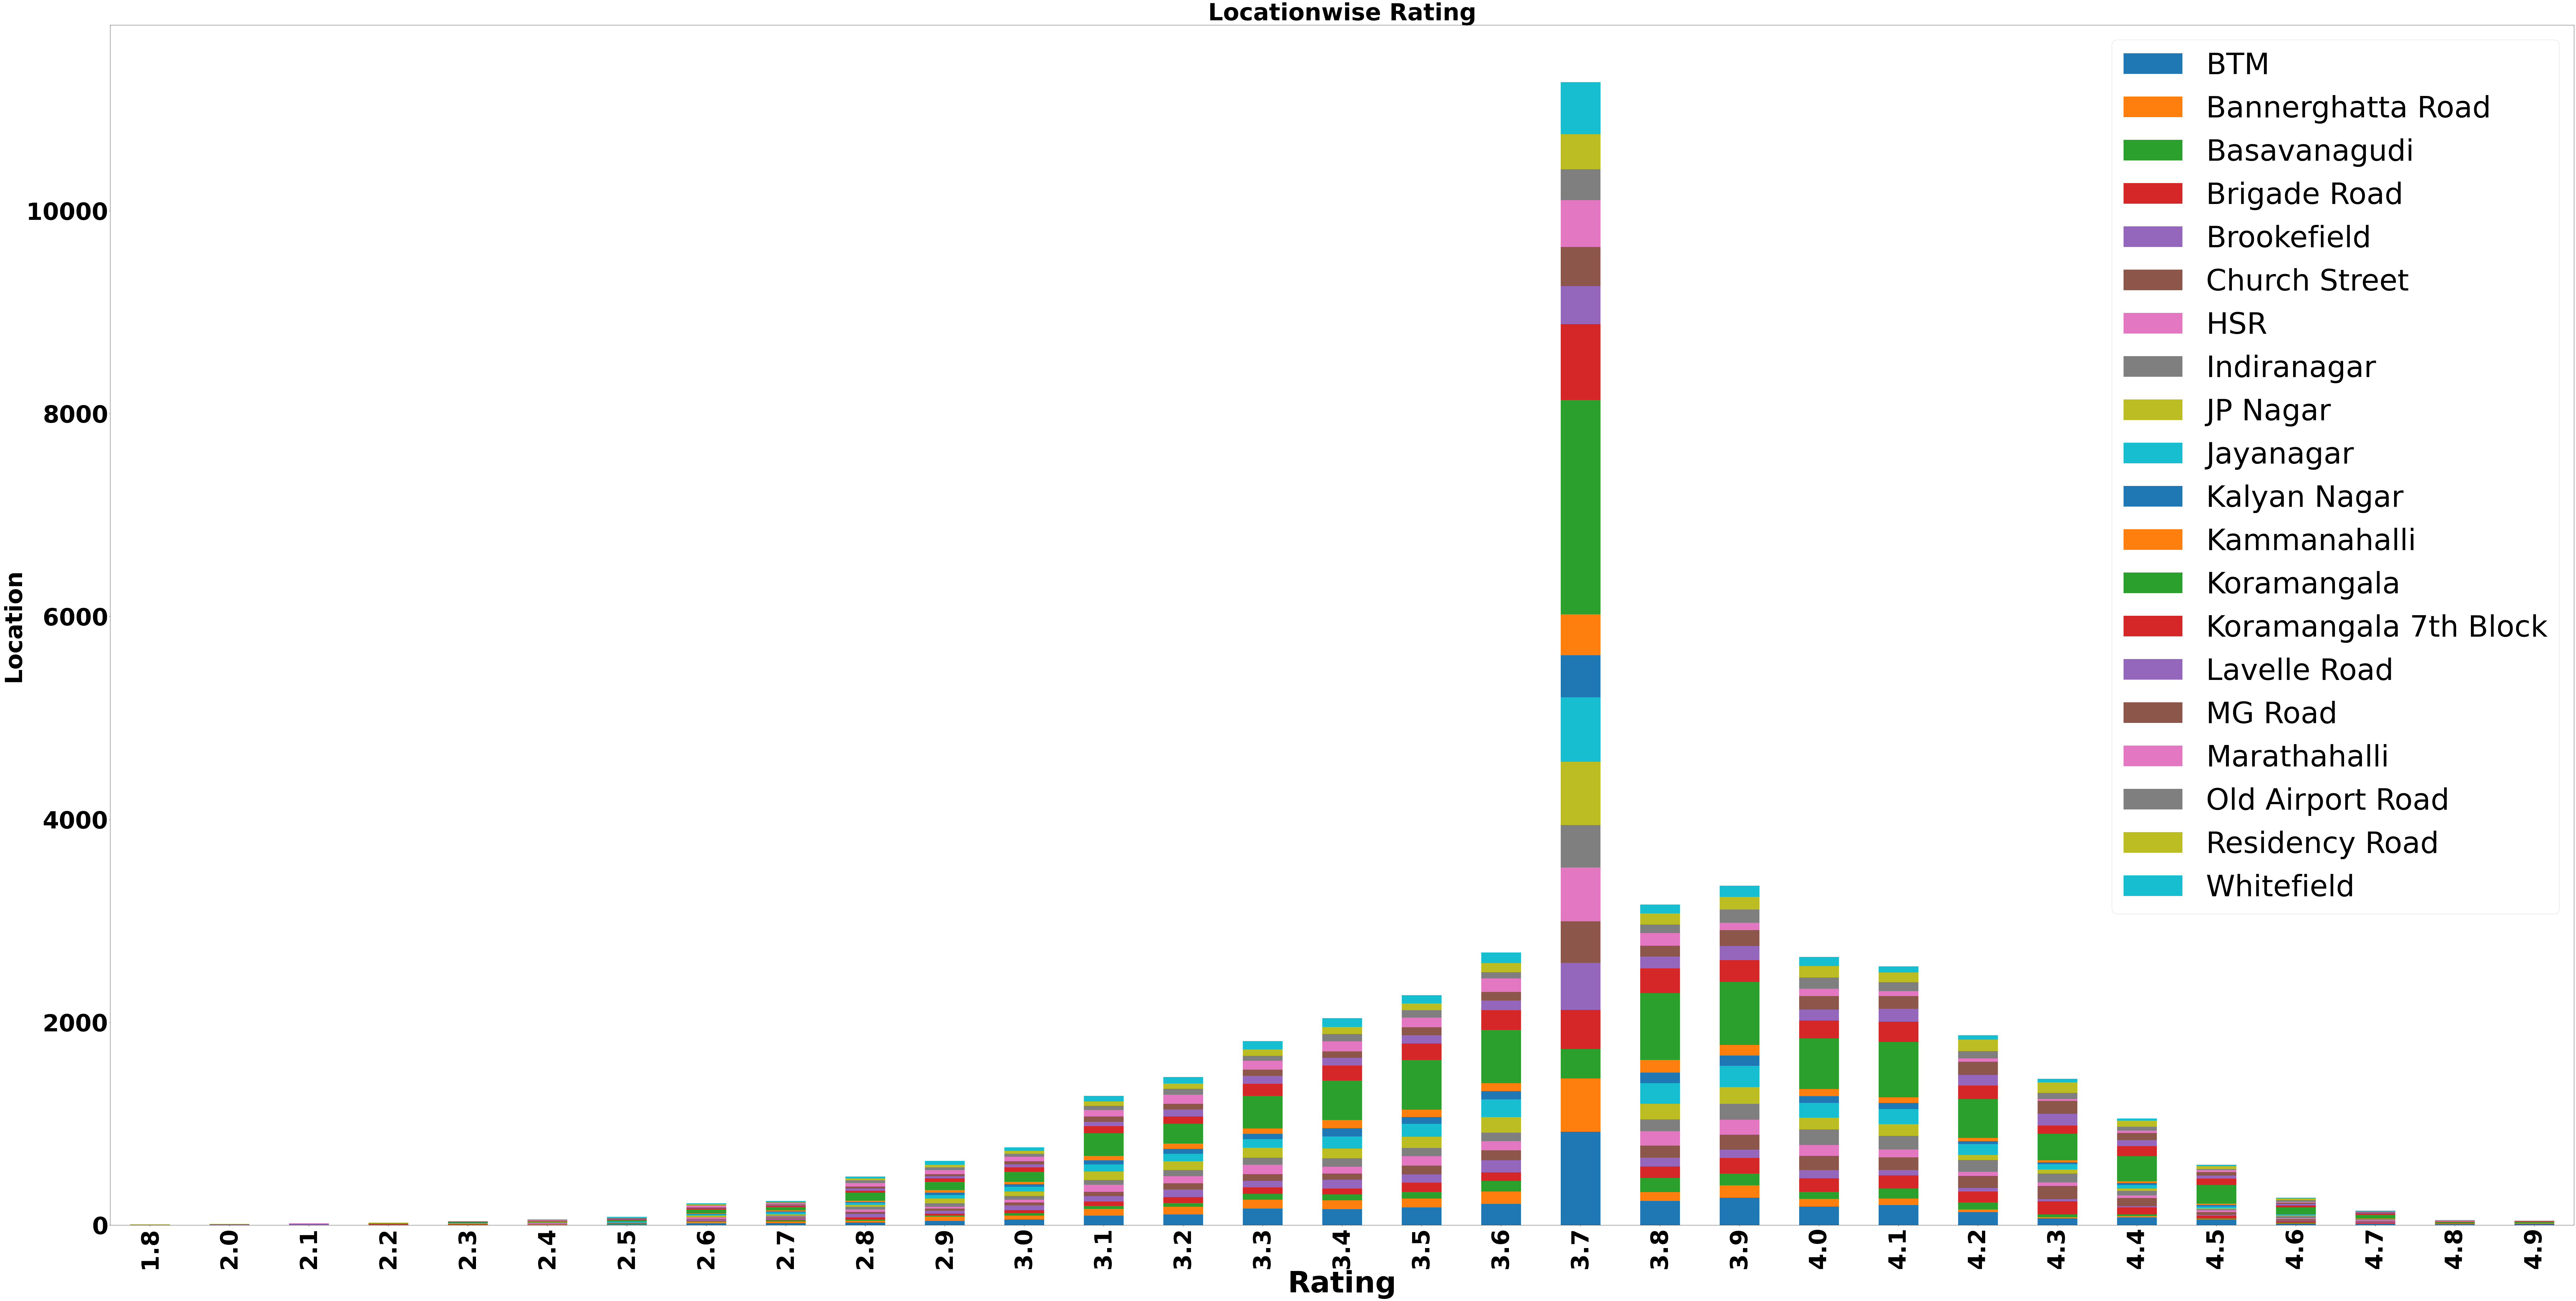

In [40]:
loc_plt=pd.crosstab(df['rate'],df['city'])
loc_plt.plot(kind='bar',stacked=True)
plt.title('Locationwise Rating',fontsize=80,fontweight='bold')
plt.ylabel('Location',fontsize=80,fontweight='bold')
plt.xlabel('Rating',fontsize=100,fontweight='bold')
plt.xticks(fontsize=80,fontweight='bold')
plt.yticks(fontsize=80,fontweight='bold')
plt.legend(fontsize=100)

Text(0.5, 1.0, 'Location wise count for restaurants')

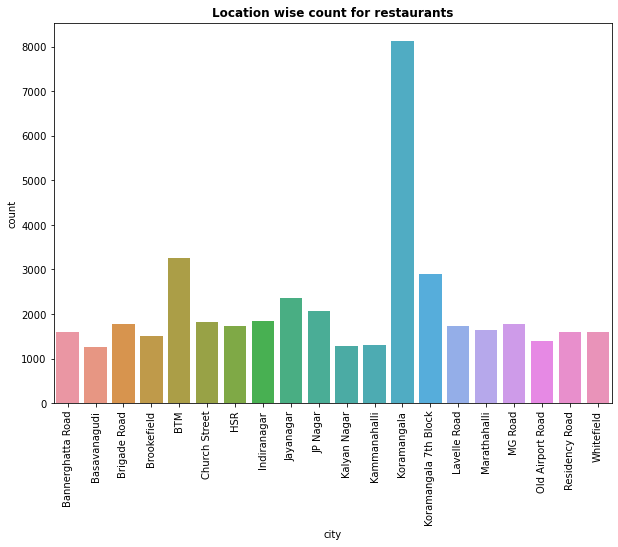

In [41]:
plt.figure(figsize=(10,7))
sns.countplot(df['city'])
sns.countplot(df['city'])
fig = plt.gcf()
plt.xticks(rotation=90)
plt.title('Location wise count for restaurants',fontweight='bold')

### Type of Restaurants

Text(0.5, 1.0, 'Restuarant Type')

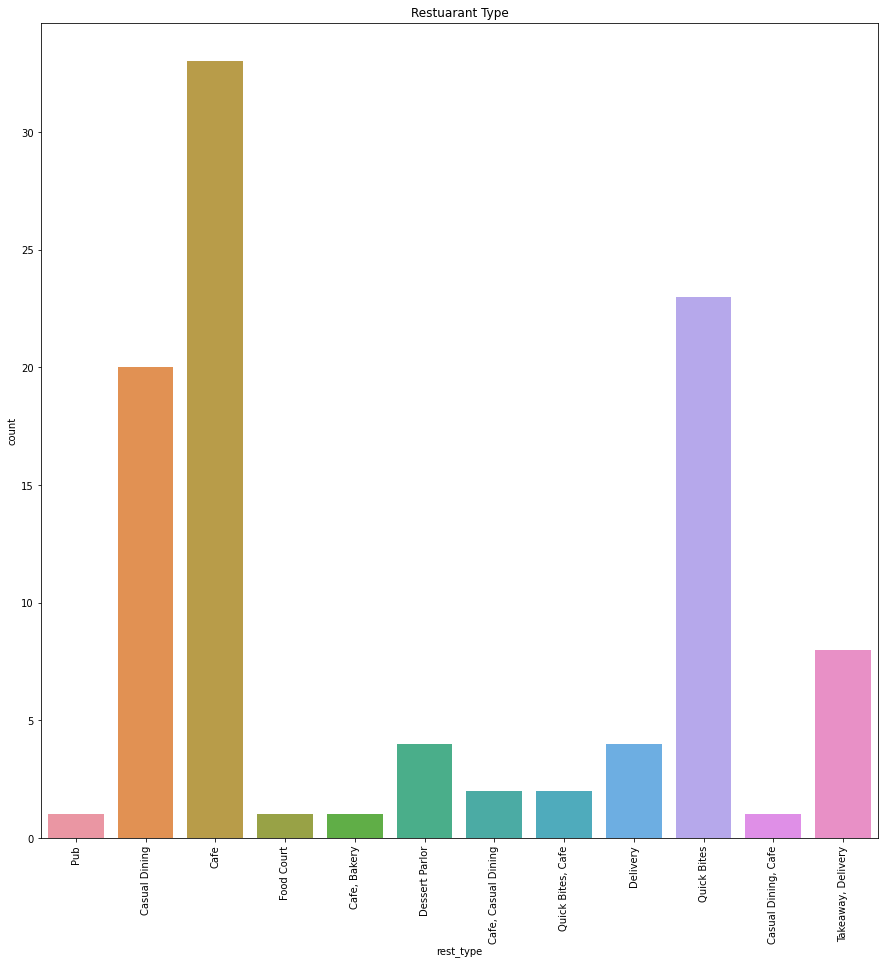

In [42]:
plt.rcParams['figure.figsize']=[10,5]
plt.figure(figsize=(7,5))
sns.countplot(df['rest_type'][:100])
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Restuarant Type')

### The top 10 types of restaurents that are with most number of transactions

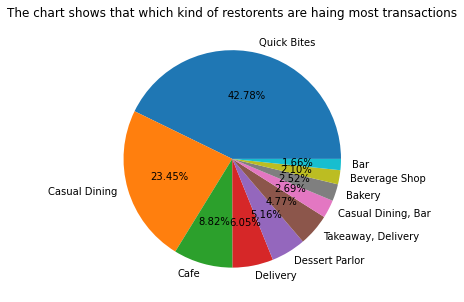

In [43]:
a=df['rest_type'].value_counts().index
b=df['rest_type'].value_counts().values

plt.figure(figsize=(5,5))
plt.pie(b[:10],labels=a[:10],autopct='%0.2f%%')
plt.title('The chart shows that which kind of restorents are haing most transactions')
plt.show()


### Location wise transaction done

In [44]:
city_list=df['location'].value_counts(ascending = False).index[:5]
city_list

Index(['BTM', 'Koramangala 5th Block', 'HSR', 'JP Nagar', 'Whitefield'], dtype='object')

In [45]:
a=df.location.value_counts(ascending=False).values
b=df.location.value_counts(ascending=False).index

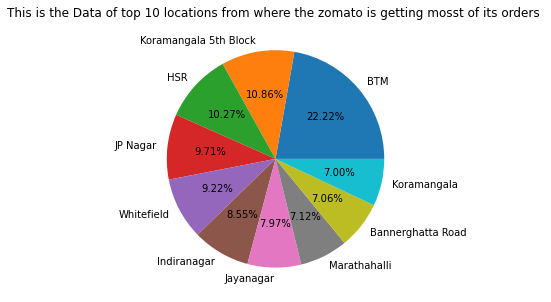

In [46]:
plt.figure(figsize=(5,5))
plt.pie(a[:10],labels=b[:10],autopct='%0.2f%%')#,explode=(0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0))
plt.title('This is the Data of top 10 locations from where the zomato is getting mosst of its orders ')
plt.show()


### This is the Data of top 10 type of food orders that zomato is getting 

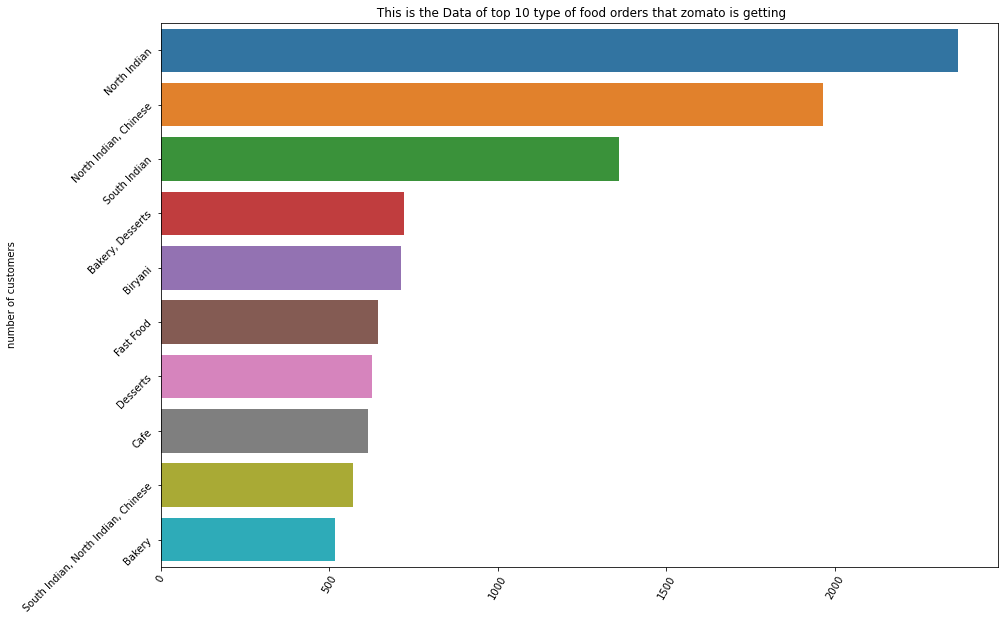

In [47]:
x=df.cuisines.value_counts().values
y=df.cuisines.value_counts().index
plt.figure(figsize=(15,10))
sns.barplot(x=x[:10],y=y[:10])
plt.ylabel('number of customers')
plt.title(' This is the Data of top 10 type of food orders that zomato is getting')
plt.xticks(rotation=60)
plt.yticks(rotation=45)
plt.show()

In [48]:
plt.rcParams['figure.figsize']=[20,10]

### The bar graph is to show that which type of Restuarents are getting how much of Rating

<Figure size 720x360 with 0 Axes>

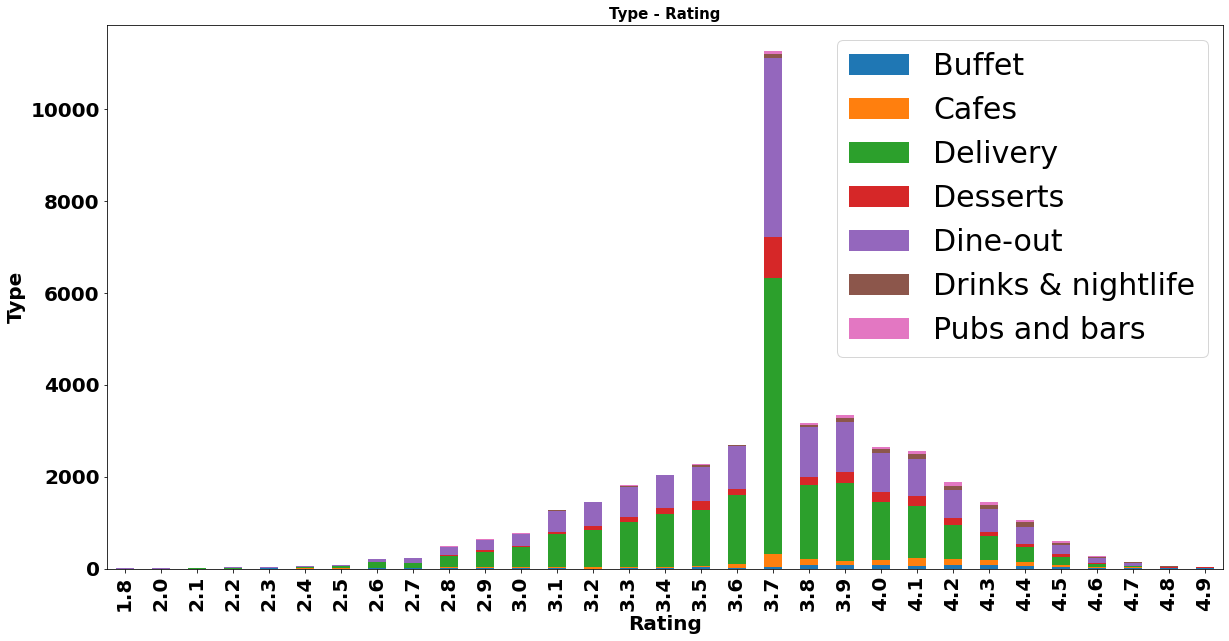

In [49]:
type_plt=pd.crosstab(df['rate'],df['type'])
plt.figure(figsize=(10,5))
type_plt.plot(kind='bar',stacked=True)
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=20,fontweight='bold')
plt.xlabel('Rating',fontsize=20,fontweight='bold')
plt.xticks(fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.legend(fontsize=30)
plt.show()

Text(0.5, 1.0, 'Cost of Restuarant')

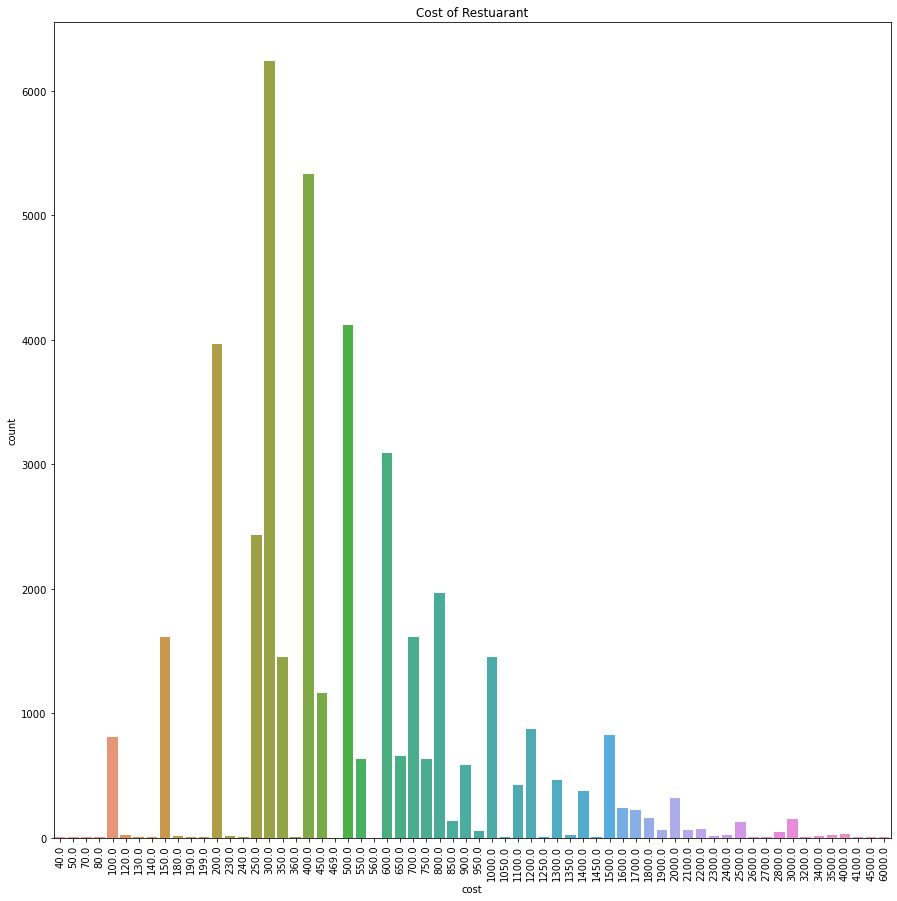

In [50]:
sns.countplot(df['cost'])
sns.countplot(df['cost'])
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')

Text(0.5, 0, 'Number of outlets')

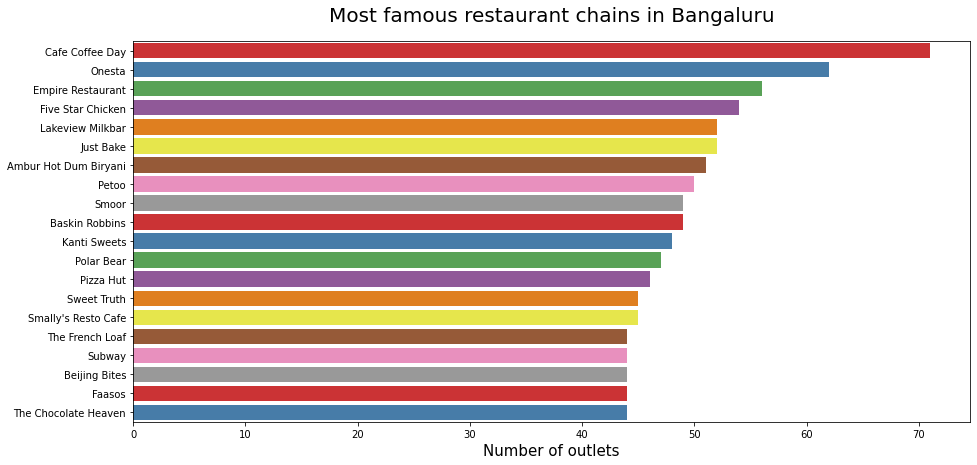

In [51]:
plt.figure(figsize=(15,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

In [52]:
catcol=df.select_dtypes('object').columns
catcol

Index(['name', 'location', 'rest_type', 'cuisines', 'type', 'city'], dtype='object')

In [53]:
catcol

Index(['name', 'location', 'rest_type', 'cuisines', 'type', 'city'], dtype='object')

In [54]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city
863,Deja Vu Resto Bar,1,1,4.4,2487,Bannerghatta Road,Pub,"North Indian, Italian",900.0,Buffet,Bannerghatta Road
864,Fattoush,1,1,4.2,1964,Bannerghatta Road,Casual Dining,"Arabian, Biryani, Chinese, Middle Eastern, Fas...",1000.0,Buffet,Bannerghatta Road
865,Empire Restaurant,1,0,4.3,3178,Bannerghatta Road,Casual Dining,"North Indian, Mughlai, South Indian, Chinese",750.0,Buffet,Bannerghatta Road
866,Abhiruchi Hotel,1,0,3.3,455,Bannerghatta Road,Casual Dining,"Andhra, Biryani, North Indian, Chinese",550.0,Buffet,Bannerghatta Road
867,Tulips,0,0,3.1,19,Bannerghatta Road,Casual Dining,"North Indian, South Indian, Chinese, Continental",800.0,Buffet,Bannerghatta Road
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.6,27,Whitefield,Bar,Continental,1500.0,Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,0,0,3.7,0,Whitefield,Bar,Finger Food,600.0,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,3.7,0,Whitefield,Bar,Finger Food,2000.0,Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,Pubs and bars,Whitefield


In [55]:
df.drop(columns=['name','rest_type','cuisines'],inplace=True)
catcol=df.select_dtypes('object').columns
df[catcol]

,location,type,city
863,Bannerghatta Road,Buffet,Bannerghatta Road
864,Bannerghatta Road,Buffet,Bannerghatta Road
865,Bannerghatta Road,Buffet,Bannerghatta Road
866,Bannerghatta Road,Buffet,Bannerghatta Road
867,Bannerghatta Road,Buffet,Bannerghatta Road
...,...,...,...
51712,Whitefield,Pubs and bars,Whitefield
51713,Whitefield,Pubs and bars,Whitefield
51714,Whitefield,Pubs and bars,Whitefield
51715,"ITPL Main Road, Whitefield",Pubs and bars,Whitefield


In [56]:
df[catcol].location.unique()

array(['Bannerghatta Road', 'JP Nagar', 'BTM', 'Jayanagar',
       'Kanakapura Road', 'Bommanahalli', 'Kumaraswamy Layout',
       'South Bangalore', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Basavanagudi', 'Banashankari', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Koramangala 8th Block',
       'Richmond Road', 'Koramangala 7th Block', 'Jalahalli',
       'Mysore Road', 'City Market', 'Koramangala 4th Block',
       'Nagarbhavi', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar',
       'HBR Layout', 'Domlur', 'Indiranagar', 'Old Airport Road',
       'Frazer Town', 'Ejipura', 'Jeevan Bhima Nagar', 'Old Madras Road',
       'Malleshwaram', 'Seshadripuram', 'Kammanahalli',
       'Koramangala 6th Block', 'Majestic', 'Langford Town',
       'Vijay Nagar', 

In [57]:

from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df[catcol]=oe.fit_transform(df[catcol])
df[catcol]

,location,type,city
863,3.0,0.0,1.0
864,3.0,0.0,1.0
865,3.0,0.0,1.0
866,3.0,0.0,1.0
867,3.0,0.0,1.0
...,...,...,...
51712,79.0,6.0,19.0
51713,79.0,6.0,19.0
51714,79.0,6.0,19.0
51715,25.0,6.0,19.0


In [58]:
unique_categories = oe.categories_[0]
unique_categories

array(['BTM', 'Banashankari', 'Banaswadi', 'Bannerghatta Road',
       'Basavanagudi', 'Bellandur', 'Bommanahalli', 'Brigade Road',
       'Brookefield', 'CV Raman Nagar', 'Central Bangalore',
       'Church Street', 'City Market', 'Commercial Street',
       'Cunningham Road', 'Domlur', 'East Bangalore', 'Ejipura',
       'Electronic City', 'Frazer Town', 'HBR Layout', 'HSR', 'Hebbal',
       'Hennur', 'Hosur Road', 'ITPL Main Road, Whitefield',
       'Indiranagar', 'Infantry Road', 'JP Nagar', 'Jakkur', 'Jalahalli',
       'Jayanagar', 'Jeevan Bhima Nagar', 'KR Puram', 'Kaggadasapura',
       'Kalyan Nagar', 'Kammanahalli', 'Kanakapura Road', 'Kengeri',
       'Koramangala', 'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block',
       'Koramangala 8th Block', 'Kumaraswamy Layout', 'Langford Town',
       'Lavelle Road', 'MG Road', 'Majestic', 'Malleshwaram',
       'Marathahalli', 'Mysore Road', 'Nagarbhavi', 'Nagawara',
       'N

In [59]:
oe.transform([['Vijay Nagar','Buffet','Whitefield']])

array([[78.,  0., 19.]])

In [60]:
df

,online_order,book_table,rate,votes,location,cost,type,city
863,1,1,4.4,2487,3.0,900.0,0.0,1.0
864,1,1,4.2,1964,3.0,1000.0,0.0,1.0
865,1,0,4.3,3178,3.0,750.0,0.0,1.0
866,1,0,3.3,455,3.0,550.0,0.0,1.0
867,0,0,3.1,19,3.0,800.0,0.0,1.0
...,...,...,...,...,...,...,...,...
51712,0,0,3.6,27,79.0,1500.0,6.0,19.0
51713,0,0,3.7,0,79.0,600.0,6.0,19.0
51714,0,0,3.7,0,79.0,2000.0,6.0,19.0
51715,0,1,4.3,236,25.0,2500.0,6.0,19.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42549 entries, 863 to 51716
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  42549 non-null  int64  
 1   book_table    42549 non-null  int64  
 2   rate          42549 non-null  float64
 3   votes         42549 non-null  int64  
 4   location      42549 non-null  float64
 5   cost          42549 non-null  float64
 6   type          42549 non-null  float64
 7   city          42549 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 2.9 MB


Index(['online_order', 'book_table', 'rate', 'votes', 'location', 'cost',
       'type', 'city'],
      dtype='object')

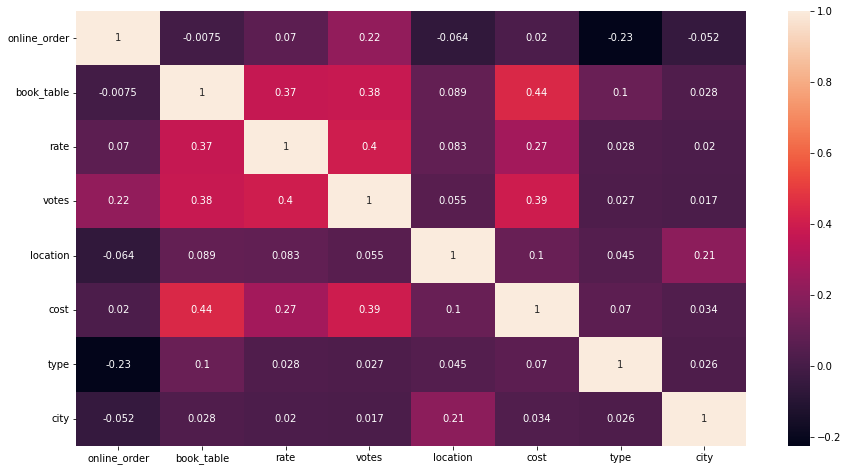

In [62]:
corr1 = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr1, annot=True)
df.columns

###  I skiped thes variables for independent variables becouse these are having negligable value of co-relation with label
'address', 'city', 'name', 'rate', 'reviews_list', 'type','votes'


### Splitting the Dataset


In [63]:
# from sklearn.preprocessing import StandardScaler
# st=StandardScaler()

In [64]:
df

,online_order,book_table,rate,votes,location,cost,type,city
863,1,1,4.4,2487,3.0,900.0,0.0,1.0
864,1,1,4.2,1964,3.0,1000.0,0.0,1.0
865,1,0,4.3,3178,3.0,750.0,0.0,1.0
866,1,0,3.3,455,3.0,550.0,0.0,1.0
867,0,0,3.1,19,3.0,800.0,0.0,1.0
...,...,...,...,...,...,...,...,...
51712,0,0,3.6,27,79.0,1500.0,6.0,19.0
51713,0,0,3.7,0,79.0,600.0,6.0,19.0
51714,0,0,3.7,0,79.0,2000.0,6.0,19.0
51715,0,1,4.3,236,25.0,2500.0,6.0,19.0


In [65]:
#Defining the independent variables and dependent variables
X= df.iloc[:,[1,3,4,5,6]]
y = df['rate']

x=np.array(X)
# x=st.fit_transform(x)
x

array([[1.000e+00, 2.487e+03, 3.000e+00, 9.000e+02, 0.000e+00],
       [1.000e+00, 1.964e+03, 3.000e+00, 1.000e+03, 0.000e+00],
       [0.000e+00, 3.178e+03, 3.000e+00, 7.500e+02, 0.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 7.900e+01, 2.000e+03, 6.000e+00],
       [1.000e+00, 2.360e+02, 2.500e+01, 2.500e+03, 6.000e+00],
       [0.000e+00, 1.300e+01, 2.500e+01, 1.500e+03, 6.000e+00]])

In [66]:
from sklearn.ensemble import RandomForestRegressor
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)

from sklearn.metrics import r2_score,mean_squared_error

In [67]:
from sklearn.ensemble import ExtraTreesRegressor
extr=ExtraTreesRegressor()
extr.fit(X_train,y_train)
y_pred=extr.predict(X_test)
print(f"R2_score is {r2_score(y_test,y_pred)}")
print(f"mean _Squere errore is {mean_squared_error(y_test,y_pred)}")
print(f"training score is {extr.score(X_train,y_train)}")
print(f"testig score is {extr.score(X_test,y_test)}")

R2_score is 0.8821534812116186
mean _Squere errore is 0.017972771911611122
training score is 0.9797768966787648
testig score is 0.8821534812116186


In [87]:
def predict_ratings(x):
    print(f'Ratings of ths Restuarent will be {extr.predict([x])}\nwith {extr.score(X_test,y_test)*100} of accuracy')

In [88]:
predict_ratings(X_train[1])

Ratings of ths Restuarent will be [3.5]
with 88.21534812116187 of accuracy
